### Importar base de dados e instalar framework de recomendação

### Importar bibliotecas

In [ ]:
!pip3 install wget

In [ ]:
import wget
!python3 -m wget https://github.com/mmanzato/MBABigData/raw/master/ml-20m-compact.tar.gz
!tar -xvzf ml-20m-compact.tar.gz


Saved under ml-20m-compact.tar.gz
dataset/
dataset/tags_sample.csv
dataset/._.DS_Store
dataset/.DS_Store
dataset/movies_sample.csv
dataset/._genome-tags.csv
dataset/genome-tags.csv
dataset/._ml-youtube.csv
dataset/ml-youtube.csv
dataset/._genome-scores.csv
dataset/genome-scores.csv
dataset/ratings_sample.csv


In [ ]:
import sys
!{sys.executable} -m pip install caserecommender

In [ ]:
import pandas as pd
import numpy as np

### Explorar Dados

In [ ]:
movies = pd.read_csv('./dataset/movies_sample.csv')
movies.tail()

,movieId,title,genres
428,129857,Bright Days Ahead (2013),Drama|Romance
429,130344,Coast of Death (2013),Children|Documentary|Drama
430,130408,A Rumor Of War (1980),(no genres listed)
431,130510,Berserk: The Golden Age Arc 3 - Descent (2013),Action|Animation|Fantasy
432,131239,Three Quarter Moon (2011),Comedy|Drama


In [ ]:
ratings = pd.read_csv('./dataset/ratings_sample.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,11,7481,5.0,1230788624
1,11,1046,4.5,1251144145
2,11,616,4.0,1230782542
3,11,3535,2.0,1230784884
4,11,5669,5.0,1230853788


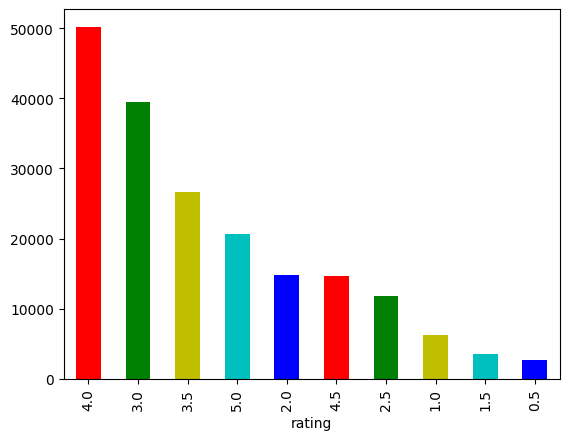

In [ ]:
import matplotlib.pyplot as plt
ratings.rating.value_counts().plot(kind='bar', color=['r', 'g', 'y', 'c', 'b']);
plt.show()

In [ ]:
df = ratings[['userId', 'movieId', 'rating']]
df.tail()

,userId,movieId,rating
190616,138493,288,5.0
190617,138493,1748,5.0
190618,138493,616,4.0
190619,138493,1597,4.5
190620,138493,7371,5.0


In [ ]:
df = df.merge(movies[['movieId', 'title']])
df.head()

,userId,movieId,rating,title
0,11,7481,5.0,Enemy Mine (1985)
1,359,7481,4.0,Enemy Mine (1985)
2,422,7481,3.0,Enemy Mine (1985)
3,424,7481,3.0,Enemy Mine (1985)
4,744,7481,3.0,Enemy Mine (1985)


### Números de usuários e número de itens

In [ ]:
print(
"""
Número de usuários: {}
Número de itens: {}
Número de interações: {}
Razão interações/usuários: {}
Razão interações/itens: {}
""".format(
    df.userId.nunique(),
    df.movieId.nunique(),
    df.shape[0],
    df.userId.nunique()/df.shape[0],
    df.movieId.nunique()/df.shape[0]
)
)


Número de usuários: 11090
Número de itens: 417
Número de interações: 190621



### Mapeamento em idx

In [ ]:
map_users = {user: idx for idx, user in enumerate(df.userId.unique())}
map_items = {item: idx for idx, item in enumerate(df.movieId.unique())}

In [ ]:
df['userId'] = df['userId'].map(map_users)
df['movieId'] = df['movieId'].map(map_items)
df.head()

,userId,movieId,rating,title
0,0,0,5.0,Enemy Mine (1985)
1,1,0,4.0,Enemy Mine (1985)
2,2,0,3.0,Enemy Mine (1985)
3,3,0,3.0,Enemy Mine (1985)
4,4,0,3.0,Enemy Mine (1985)


In [ ]:
map_title = {}

for _, row in df.iterrows():
    map_title[row.movieId] = row.title

In [ ]:
print(len(map_title))
print(map_title[100])

417
Send Me No Flowers (1964)


In [ ]:
# qtd interações dos usuários
df.groupby('userId').count()

,movieId,rating,title
userId,,,
0,13,13,13
1,25,25,25
2,14,14,14
3,25,25,25
4,11,11,11
...,...,...,...
11085,11,11,11
11086,10,10,10
11087,25,25,25


### Divisão do dataset

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=.2, random_state=2)
train.to_csv('train.txt', index=False, header=False, sep='\t')
test.to_csv('test.txt', index=False, header=False, sep='\t')

In [ ]:
! ls -l

total 70776
drwxr-xr-x 2  501 staff     4096 Mar 17  2022 dataset
-rw-r--r-- 1 root root  65019041 Aug 18 13:05 ml-20m-compact.tar.gz
drwxr-xr-x 1 root root      4096 Aug 14 13:23 sample_data
-rw-r--r-- 1 root root   1490769 Aug 18 13:06 test.txt
-rw-r--r-- 1 root root   5951786 Aug 18 13:06 train.txt


In [ ]:
print('No. items: ' + str(train['movieId'].nunique()))
print('No. users: ' + str(train['userId'].nunique()))

No. items: 403
No. users: 11090


### Recomendadores

## Prever notas

In [ ]:
from caserec.recommenders.rating_prediction.most_popular import MostPopular

In [ ]:
MostPopular('train.txt', 'test.txt', 'out_mp_pred.txt').compute()

[Case Recommender: Rating Prediction > Most Popular]

train data:: 11090 users and 403 items (152496 interactions) | sparsity:: 96.59%
test data:: 10503 users and 340 items (38125 interactions) | sparsity:: 98.93%

prediction_time:: 98.670604 sec


Eval:: MAE: 0.703266 RMSE: 0.910252 


In [ ]:
df_pred = pd.read_csv('out_mp_pred.txt', sep='\t', names=['userId', 'movieId', 'pred'])
df_pred.head(10)

,userId,movieId,pred
0,0,0,3.443980
1,0,5,3.333857
2,1,6,3.573171
3,1,106,3.290084
4,1,21,3.211811
5,1,30,3.651042
6,1,12,4.176005
7,2,30,3.651042
8,2,42,3.513158
9,2,69,2.475379


In [ ]:
test[test.userId == 1]

,userId,movieId,rating,title
17476,1,6,4.5,Apocalypto (2006)
172435,1,106,2.5,Shopgirl (2005)
75352,1,21,2.5,Conspiracy Theory (1997)
103814,1,30,3.5,Collateral (2004)
31545,1,12,4.0,Star Wars: Episode V - The Empire Strikes Back...


In [ ]:
df_pred = df_pred.merge(test)

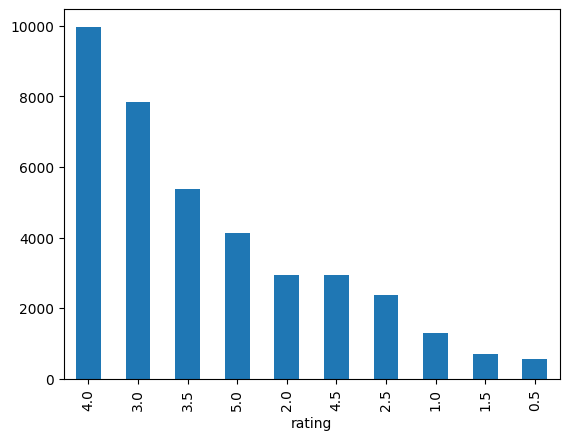

In [ ]:
df_pred.rating.value_counts().plot(kind='bar')
plt.show()

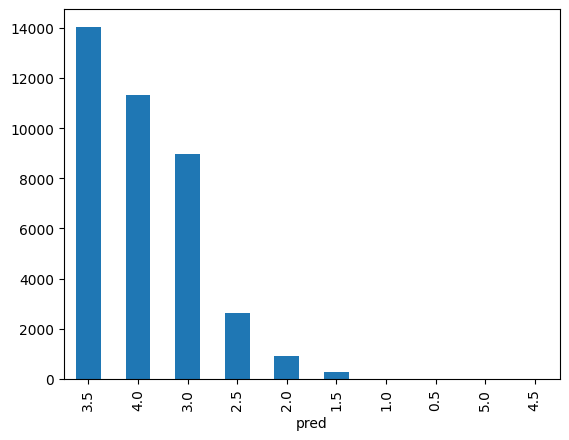

In [ ]:
df_pred['pred'] = round(df_pred['pred']*2)/2
df_pred.pred.value_counts().plot(kind='bar');
plt.show()

### Top N

In [ ]:
from caserec.recommenders.item_recommendation.most_popular import MostPopular as MPR

In [ ]:
MPR('train.txt', 'test.txt', 'out_mp_pred_binary.txt', as_binary=True).compute()

[Case Recommender: Item Recommendation > Most Popular]

train data:: 11090 users and 403 items (152496 interactions) | sparsity:: 96.59%
test data:: 10503 users and 340 items (38125 interactions) | sparsity:: 98.93%

prediction_time:: 2.176353 sec


Eval:: PREC@1: 0.390555 PREC@3: 0.253801 PREC@5: 0.21312 PREC@10: 0.167009 RECALL@1: 0.123509 RECALL@3: 0.227113 RECALL@5: 0.311363 RECALL@10: 0.481113 MAP@1: 0.390555 MAP@3: 0.458313 MAP@5: 0.463942 MAP@10: 0.437594 NDCG@1: 0.390555 NDCG@3: 0.523907 NDCG@5: 0.549345 NDCG@10: 0.552196 


In [ ]:
ranking = pd.read_csv('out_mp_pred_binary.txt', sep='\t', names=['userId', 'movieId', 'score'])
ranking['title'] = ranking.movieId.map(map_title)
ranking.head(15)

,userId,movieId,score,title
0,0,19,6379.0,Reservoir Dogs (1992)
1,0,22,4562.0,Natural Born Killers (1994)
2,0,17,4461.0,Chasing Amy (1997)
3,0,18,4279.0,Life Is Beautiful (La Vita è bella) (1997)
4,0,33,3860.0,North by Northwest (1959)
5,0,21,3666.0,Conspiracy Theory (1997)
6,0,5,3503.0,"I, Robot (2004)"
7,0,20,3471.0,While You Were Sleeping (1995)
8,0,23,3466.0,Crimson Tide (1995)
9,0,28,3344.0,My Best Friend's Wedding (1997)


### Item KNN

In [ ]:
from caserec.recommenders.rating_prediction.itemknn import ItemKNN

ItemKNN('train.txt', 'test.txt', 'rp_iknn.txt', as_similar_first=True).compute()

[Case Recommender: Rating Prediction > ItemKNN Algorithm]

train data:: 11090 users and 403 items (152496 interactions) | sparsity:: 96.59%
test data:: 10503 users and 340 items (38125 interactions) | sparsity:: 98.93%

training_time:: 7.214586 sec
prediction_time:: 2.585017 sec
Eval:: MAE: 0.665964 RMSE: 0.876739 


Usuário que avaliou mais filmes na base. Informe o id externo (da base dados) e o interno (usado pelo recomendador)

In [ ]:
user_id_interno = df.userId.value_counts().idxmax()
user_id_externo = list(map_users)[user_id_interno]
num_avaliacoes = df.userId.value_counts()[user_id_interno]


df_user_most_ratings = pd.DataFrame({
    'userId Interno': [user_id_interno],
    'userId Externo': [user_id_externo],
    'Número de Avaliações': [num_avaliacoes]
})

df_user_most_ratings

,userId Interno,userId Externo,Número de Avaliações
0,1129,118205,163


5 primeiros usuários que têm maior propensão a dar notas baixas aos filmes (use a média de ratings para isso).

In [ ]:
# Calcular a média das notas por usuário
user_mean_ratings = df.groupby('userId')['rating'].mean()

# Ordenar os usuários pela média das notas em ordem crescente (da menor para a maior)
users_lowest_mean_ratings = user_mean_ratings.sort_values().head(5)

# Obter os ids externos (originais) desses usuários
user_ids_externos = [list(map_users)[user_id] for user_id in users_lowest_mean_ratings.index]

df_lowest_mean_ratings = pd.DataFrame({
    'userId Externo': user_ids_externos,
    'Média de Notas': users_lowest_mean_ratings
})

df_lowest_mean_ratings.reset_index()

,userId,userId Externo,Média de Notas
0,5668,113857,0.735294
1,3102,2084,0.961538
2,1025,83891,1.115385
3,8781,102570,1.205882
4,1186,135142,1.307692


5 filmes pior avaliados pelos usuários.

In [ ]:
#Calcular média das notas por filme
movie_mean_ratings = df.groupby('movieId')['rating'].mean()

# Ordenar os filmes pela média das notas em ordem crescente (da menor para a maior)
movies_lowest_mean_ratings = movie_mean_ratings.sort_values().head(5)

#Converter de Serie para Dataframe
movies_lowest_ratings = movies_lowest_mean_ratings.to_frame().reset_index()

#Incluir os Titulos
movies_lowest_ratings['title'] = movies_lowest_ratings['movieId'].map(map_title)

movies_lowest_ratings

,movieId,rating,title
0,328,1.000000,Snapshot (1979)
1,414,1.000000,Heroic Purgatory (Rengoku eroica) (1970)
2,409,1.000000,Hercules (2005)
3,376,1.166667,Loaded (2008)
4,305,1.500000,Australian Atomic Confessions (2005)


Recomendação de 5 filmes para um usuário qualquer da base considerando estratégia não personalizada.

In [ ]:
#Filtrar filmes com reviews insuficientes  (valor escolhido = 20)
min_reviews = 20
movie_rating_counts = df.groupby('movieId')['rating'].count()
movies_with_20_ratings = movie_rating_counts[movie_rating_counts >= min_reviews].index

#Obter a média das notas dos filmes com reviews suficientes
movie_mean_ratings = df[df['movieId'].isin(movies_with_20_ratings)].groupby('movieId')['rating'].mean()

# Ordenar os filmes pela média das notas em ordem crescente (da menor para a maior)
movies_highest_mean_ratings = movie_mean_ratings.sort_values(ascending=False).head(5)

#Converter de Serie para Dataframe
movies_highest_ratings = movies_highest_mean_ratings.to_frame().reset_index()

#Incluir os Titulos
movies_highest_ratings['title'] = movies_highest_ratings['movieId'].map(map_title)

movies_highest_ratings = movies_highest_ratings.drop(columns=['movieId','rating'])
movies_highest_ratings

,title
0,North by Northwest (1959)
1,Star Wars: Episode V - The Empire Strikes Back...
2,"Samouraï, Le (Godson, The) (1967)"
3,Reservoir Dogs (1992)
4,Fog of War: Eleven Lessons from the Life of Ro...


Função que retorna os k filmes mais similares a um outro qualquer passado como parâmetro.

In [ ]:
#utils

def get_movie_user_ids(movieId):
    if movieId not in df['movieId'].values:
        return []
    return (df.loc[(df.movieId==movieId),'userId'].tolist())

def get_movie_ratings(movieId):
    if movieId not in df['movieId'].values:
        return []
    return (df.loc[(df.movieId==movieId),'rating'].tolist())

def get_movie_mean(movieId):
    return np.mean(get_movie_ratings(movieId))

def get_rating(movieId, userId):
    if len(df[(df['movieId']==movieId)&(df['userId']==userId)]) == 0:
        return 0
    return (df.loc[(df.movieId==movieId) & (df.userId==userId),'rating'].iloc[0])

In [ ]:
from statistics import mean
from math import pow, sqrt

def similarity_score(movieId1, movieId2):
    '''
    movieId1 & movieId2 : ids dos dois usuários cuja similaridade será computada
    '''
    # Contar quantos usuários em comum avaliaram os filmes.
    movie_list1 = get_movie_user_ids(movieId1)
    movie_list2 = get_movie_user_ids(movieId2)
    common_users = list(set(movie_list1) & set(movie_list2))
    if len(common_users) == 0:
        return 0

    # Calcular a média de cada filme
    movie1_mean = np.mean(get_movie_mean(movieId1))
    movie2_mean = get_movie_mean(movieId2)

    # Cálculo da similaridade.
    sim = []
    norm1 = []
    norm2 = []
    for user in common_users:
        rating1 = get_rating(movieId1, user)
        rating2 = get_rating(movieId2, user)
        sim.append((rating1 - movie1_mean)*(rating2 - movie2_mean))
        norm1.append(pow(rating1 - movie1_mean, 2))
        norm2.append(pow(rating2 - movie2_mean, 2))

    normdiv = sqrt(sum(norm1)) * sqrt(sum(norm2))
    if(normdiv == 0):
      return 0

    return sum(sim) / (sqrt(sum(norm1)) * sqrt(sum(norm2)))

In [ ]:
# TODO
def most_similar_movies(movieId,k):
    '''
    movieId : Targeted Movie
    k : qtde de vizinhos
    '''
    # Obter lista de filmes
    movie_ids = df.movieId.unique().tolist()

    # Obter a similaridade entre o filme alvo e os demais filmes
    sim = [(similarity_score(movieId, u), u) for u in movie_ids if u != movieId]

    # Ordenação inversa.
    sim.sort(reverse=True)

    # Retornando os filmes mais similares.
    return sim[:k]

In [ ]:
most_similar_to_0 = most_similar_movies(0,5)
most_similar_to_0

[(1.0, 408), (1.0, 378), (1.0, 366), (1.0, 362), (1.0, 335)]

#Segmento 2

### Importar base de dados

In [ ]:
import wget
!python3 -m wget https://github.com/mmanzato/MBABigData/raw/master/ml-20m-compact.tar.gz
!tar -xvzf ml-20m-compact.tar.gz


Saved under ml-20m-compact.tar (1).gz
dataset/
dataset/tags_sample.csv
dataset/._.DS_Store
dataset/.DS_Store
dataset/movies_sample.csv
dataset/._genome-tags.csv
dataset/genome-tags.csv
dataset/._ml-youtube.csv
dataset/ml-youtube.csv
dataset/._genome-scores.csv
dataset/genome-scores.csv
dataset/ratings_sample.csv


In [ ]:
movies = pd.read_csv('./dataset/movies_sample.csv')
ratings = pd.read_csv('./dataset/ratings_sample.csv')
df = ratings[['userId', 'movieId', 'rating']]
df = df.merge(movies[['movieId', 'title']])
df

,userId,movieId,rating,title
0,11,7481,5.0,Enemy Mine (1985)
1,359,7481,4.0,Enemy Mine (1985)
2,422,7481,3.0,Enemy Mine (1985)
3,424,7481,3.0,Enemy Mine (1985)
4,744,7481,3.0,Enemy Mine (1985)
...,...,...,...,...
190616,131651,118606,3.5,Dots (1940)
190617,134567,118606,3.5,Dots (1940)
190618,131651,96257,1.0,Heroic Purgatory (Rengoku eroica) (1970)
190619,131651,98337,4.0,97 Percent True (2008)


### Mapeamento de ids

In [ ]:
map_users = {user: idx for idx, user in enumerate(df.userId.unique())}
map_items = {item: idx for idx, item in enumerate(df.movieId.unique())}
df['userId'] = df['userId'].map(map_users)
df['movieId'] = df['movieId'].map(map_items)
map_title = {}

for _, row in df.iterrows():
    map_title[row.movieId] = row.title


### Divisão da base em treino e teste

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=.2, random_state=2)

Considerando o modelo SVD++, uma de suas extensões em relação ao SVD otimizado é a consideração da lista de itens que o usuário forneceu feedback implícito (por exemplo, antes de fornecer uma nota a um filme, ele "navegou" por outros filmes, sem dar nota). Podemos simular essa navegação com a base de dados fornecida considerando como feedback implícito de cada usuário o conjunto de itens que ele avaliou, descartando as notas.

Função de treinamento do modelo SVD++.

In [ ]:
from math import sqrt

def train_svdpp(train, n_factors, lr=0.05, reg=0.02, miter=10):
    global_mean = train['rating'].mean()
    n_users = df['userId'].max() + 1
    n_items = df['movieId'].max() + 1
    bu = np.zeros(n_users)
    bi = np.zeros(n_items)
    p = np.random.normal(0.1, 0.1, (n_users, n_factors))
    q = np.random.normal(0.1, 0.1, (n_items, n_factors))
    implicit_factors = np.random.normal(0.1, 0.1, (n_items, n_factors))

    error = []

    for t in range(miter):
        sq_error = 0

        implicit_sum = np.zeros((n_users, n_factors))
        for index, row in train.iterrows():
            u = row['userId']
            i = row['movieId']
            r_ui = row['rating']

            temp_p = p[u]
            temp_q = q[i]

            implicit_items = train[train['userId'] == u]['movieId'].values
            implicit_sum[u] = np.sum(implicit_factors[implicit_items], axis=0)
            pred = global_mean + bu[u] + bi[i] + np.dot(temp_p + implicit_sum[u], temp_q)
            e_ui = r_ui - pred
            sq_error += e_ui ** 2

            # Atualiza os biases
            bu[u] += lr * (e_ui - reg * bu[u])
            bi[i] += lr * (e_ui - reg * bi[i])

            # Atualiza os fatores
            """for f in range(n_factors): #fixed to not use for loop anymore
                temp_p = p[u][f]
                p[u][f] += lr * (e_ui * q[i][f] - reg * p[u][f])
                q[i][f] += lr * (e_ui * temp_p - reg * q[i][f])
            """

            p[u] += lr * (e_ui * temp_q - reg * temp_p)
            q[i] += lr * (e_ui * temp_p - reg * temp_q)

            # Atualiza os fatores implícitos
            for j in implicit_items:
                implicit_factors[j] += lr * (e_ui * q[i] - reg * implicit_factors[j])

        error.append(sqrt(sq_error / len(train)))

    return global_mean, bu, bi, p, q, implicit_factors, error

In [ ]:
gl, bu, bi, p, q, impf, error = train_svdpp(train, 2, miter=30)

<ipython-input-36-2bc3ba5ce4c0>:32: RuntimeWarning: overflow encountered in scalar power
  sq_error += e_ui ** 2
<ipython-input-36-2bc3ba5ce4c0>:46: RuntimeWarning: overflow encountered in multiply
  implicit_factors[j] += lr * (e_ui * q[i] - reg * implicit_factors[j])
<ipython-input-36-2bc3ba5ce4c0>:46: RuntimeWarning: invalid value encountered in subtract
  implicit_factors[j] += lr * (e_ui * q[i] - reg * implicit_factors[j])
<ipython-input-36-2bc3ba5ce4c0>:46: RuntimeWarning: invalid value encountered in add
  implicit_factors[j] += lr * (e_ui * q[i] - reg * implicit_factors[j])
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


ValueError: too many values to unpack (expected 6)

Plotagem da curva de aprendizado do modelo.

In [ ]:
import matplotlib.pyplot as plt
plt.plot(error)
plt.show()

Função de predição do modelo SVD++ comparando algumas notas preditas com as respectivas notas reais do conjunto de teste.

In [ ]:
def predict_svdpp(global_mean, bu, bi, p, q, implicit_factors, user_id, movie_id):
    if user_id >= len(bu) or movie_id >= len(bi):
        return global_mean

    implicit_items = train[train['userId'] == user_id]['movieId'].values
    implicit_sum = np.sum(implicit_factors[implicit_items], axis=0) if len(implicit_items) > 0 else np.zeros(p.shape[1])

    prediction = global_mean + bu[user_id] + bi[movie_id] + np.dot(p[user_id] + implicit_sum, q[movie_id])
    return prediction

def evaluate_model_svdpp(global_mean, bu, bi, p, q, implicit_factors, test_data):
    predictions = []
    actuals = []

    for index, row in test_data.iterrows():
        user_id = row['userId']
        movie_id = row['movieId']
        actual_rating = row['rating']

        predicted_rating = predict_svdpp(global_mean, bu, bi, p, q, implicit_factors, user_id, movie_id)

        predictions.append(predicted_rating)
        actuals.append(actual_rating)

    predictions = np.array(predictions)
    actuals = np.array(actuals)

    rmse = np.sqrt(np.mean((predictions - actuals) ** 2))
    print(f'RMSE: {rmse}')

    return predictions, actuals

In [ ]:
global_mean, bu, bi, p, q, implicit_factors, _ = train_svdpp(train, n_factors=10, lr=0.05, reg=0.02, miter=20)

predictions, actuals = evaluate_model_svdpp(global_mean, bu, bi, p, q, implicit_factors, test)

for i in range(10):
    print(f'Predicted: {predictions[i]:.2f}, Actual: {actuals[i]:.2f}')

Comparação do desempenho entre as instâncias GMF, MLP e NeuMF nesta base de dados (ml-20m-compact).

In [ ]:
import torch
import torch.nn as nn

class GMF(nn.Module):
    def __init__(self, num_users, num_items, embedding_dim):
        nn.Module.__init__(self)
        self.user_embedding = nn.Embedding(num_users, embedding_dim)
        self.item_embedding = nn.Embedding(num_items, embedding_dim)

        # COMENTAR SE FOR USAR NeuMF
        # Definir a camada de saída
        self.output = nn.Linear(embedding_dim, 1)
        self.sigmoid = nn.Sigmoid()
        # COMENTAR SE FOR USAR NeuMF

        nn.init.normal_(self.user_embedding.weight, std=0.01)
        nn.init.normal_(self.item_embedding.weight, std=0.01)

    def forward(self, user, item):
        user_emb = self.user_embedding(user)
        item_emb = self.item_embedding(item)

        output = user_emb * item_emb  # Produto de Hadamard

        # COMENTAR SE FOR USAR NeuMF
        # Passar pela camada de saída e aplicar sigmoid
        output = self.sigmoid(self.output(output))
        # COMENTAR SE FOR USAR NeuMF

        return output


class MLP(nn.Module):
    def __init__(self, num_users, num_items, embedding_dim, hidden_layers=[64, 32, 16, 8]):
        nn.Module.__init__(self)
        self.user_embedding = nn.Embedding(num_users, embedding_dim)
        self.item_embedding = nn.Embedding(num_items, embedding_dim)

        nn.init.normal_(self.user_embedding.weight, std=0.01)
        nn.init.normal_(self.item_embedding.weight, std=0.01)

        layers = []
        input_size = embedding_dim * 2
        for hidden_size in hidden_layers:
            layers.append(nn.Linear(input_size, hidden_size))
            layers.append(nn.ReLU())
            input_size = hidden_size

        self.mlp_layers = nn.Sequential(*layers)

    def forward(self, user, item):
        user_emb = self.user_embedding(user)
        item_emb = self.item_embedding(item)
        mlp_input = torch.cat([user_emb, item_emb], dim=-1)
        mlp_output = self.mlp_layers(mlp_input)
        return mlp_output

In [ ]:
class NeuMF(GMF, MLP):
    def __init__(self, num_users, num_items, embedding_dim, hidden_layers=[64, 32, 16, 8], pretrained_gmf=None, pretrained_mlp=None):
        nn.Module.__init__(self)  # Inicializa o nn.Module, necessário em herança múltipla
        GMF.__init__(self, num_users, num_items, embedding_dim)
        MLP.__init__(self, num_users, num_items, embedding_dim, hidden_layers)

        # Camada final para combinar as saídas do GMF e MLP
        combined_input_size = embedding_dim + hidden_layers[-1]
        self.output_layer = nn.Linear(combined_input_size, 1)
        self.sigmoid = nn.Sigmoid()

        # Carregar pesos pré-treinados se fornecidos
        if pretrained_gmf:
            self.gmf_user_embedding.weight.data.copy_(pretrained_gmf.user_embedding.weight)
            self.gmf_item_embedding.weight.data.copy_(pretrained_gmf.item_embedding.weight)
        if pretrained_mlp:
            self.mlp_user_embedding.weight.data.copy_(pretrained_mlp.user_embedding.weight)
            self.mlp_item_embedding.weight.data.copy_(pretrained_mlp.item_embedding.weight)
            self.mlp_layers.load_state_dict(pretrained_mlp.mlp_layers.state_dict())

    def forward(self, user, item):
        # GMF forward pass
        gmf_output = GMF.forward(self, user, item)

        # MLP forward pass
        mlp_output = MLP.forward(self, user, item)

        # Concatenar as saídas de GMF e MLP
        combined_output = torch.cat([gmf_output, mlp_output], dim=-1)

        # Passar pela camada de saída e aplicar sigmoid
        output = self.sigmoid(self.output_layer(combined_output))

        return output

In [ ]:
# Certifique-se de ajustar o caminho para o local onde você salvou o arquivo u.data
df = pd.read_csv('ml-100k/u.data', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])

# Remover a coluna de timestamp, pois não é necessária
df = df.drop('timestamp', axis=1)

# Converter IDs para índices consecutivos (necessário para o PyTorch)
df['user_id'] = df['user_id'].astype('category').cat.codes.values
df['item_id'] = df['item_id'].astype('category').cat.codes.values

# Converter as avaliações para binárias (1 se rating >= 4, caso contrário 0)
df['rating'] = (df['rating'] >= 4).astype(int)

# Dividir os dados em conjuntos de treino e teste
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Converter para tensores PyTorch e garantir que sejam do tipo LongTensor
train_users = torch.tensor(train_data['user_id'].values, dtype=torch.long)
train_items = torch.tensor(train_data['item_id'].values, dtype=torch.long)
train_ratings = torch.tensor(train_data['rating'].values).float()

test_users = torch.tensor(test_data['user_id'].values, dtype=torch.long)
test_items = torch.tensor(test_data['item_id'].values, dtype=torch.long)
test_ratings = torch.tensor(test_data['rating'].values).float()

# Criar DataLoader para facilitar o treinamento em mini-batches
train_dataset = data.TensorDataset(train_users, train_items, train_ratings)
train_loader = data.DataLoader(train_dataset, batch_size=256, shuffle=True)

In [ ]:
# Definir os hiperparâmetros
num_users = df['user_id'].nunique()
num_items = df['item_id'].nunique()
embedding_dim = 20  # Dimensão das embeddings
hidden_layers = [64, 32, 16, 8]  # Estrutura das camadas ocultas do MLP
learning_rate = 0.001
num_epochs = 20

# Instanciar o modelo NeuMF
#model = NeuMF(num_users, num_items, embedding_dim, hidden_layers)

model = GMF(num_users, num_items, embedding_dim)

# Definir o otimizador e a função de perda
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = torch.nn.BCELoss()

# Treinamento do modelo
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0

    for user, item, rating in train_loader:
        optimizer.zero_grad()

        # Passar os dados pelo modelo
        prediction = model(user, item)
        loss = criterion(prediction.squeeze(), rating)

        # Backpropagation e atualização dos pesos
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss/len(train_loader):.4f}')

In [ ]:
model.eval()
with torch.no_grad():
    test_prediction = model(test_users, test_items)
    test_loss = criterion(test_prediction.squeeze(), test_ratings)
    print(f'Test Loss: {test_loss.item():.4f}')

In [ ]:
import pandas as pd
import numpy as np
from caserec.recommenders.rating_prediction.item_attribute_knn import ItemAttributeKNN
from sklearn.neural_network import MLPClassifier, MLPRegressor


In [ ]:
!python3 -m wget https://github.com/mmanzato/MBABigData/raw/master/ml-20m-compact.tar.gz
!tar -xvzf ml-20m-compact.tar.gz

In [ ]:
movies = pd.read_csv('./dataset/movies_sample.csv')
ratings = pd.read_csv('./dataset/ratings_sample.csv')
df = ratings[['userId', 'movieId', 'rating']]
df = df.merge(movies[['movieId', 'title']])
df

In [ ]:
movies_tags = pd.read_csv('./dataset/tags_sample.csv')
movies_tags.head()

In [ ]:
map_users = {user: idx for idx, user in enumerate(df.userId.unique())}
map_items = {item: idx for idx, item in enumerate(df.movieId.unique())}
df['userId'] = df['userId'].map(map_users)
df['movieId'] = df['movieId'].map(map_items)
movies_tags['userId'] = movies_tags['userId'].map(map_users)
movies_tags['movieId'] = movies_tags['movieId'].map(map_items)
map_title = {}

for _, row in df.iterrows():
    map_title[row.movieId] = row.title


In [ ]:
movies_tags.head()

### Divisão da base em treino e teste

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=.2, random_state=2)

Filtragem baseada em conteúdo ItemAttributeKNN com as tags associadas aos filmes da base, utilizando Jaccard como métrica de similaridade e k=5 vizinhos para predição.

In [ ]:
# Saving the data to csv files
train.to_csv('train.csv', index=False, sep='\t', header=False)
test.to_csv('test.csv', index=False, sep='\t', header=False)
movies_tags[['movieId', 'tag']].to_csv('tags.csv', index=False, sep='\t', header=False)

In [ ]:
# Obter a lista de gêneros de um item
def get_tags(itemId):
    if itemId not in movies_tags['movieId'].values:
        return []
    return movies_tags.loc[(movies_tags['movieId']==itemId),'tag'].tolist()

get_tags(0)

In [ ]:
# get similarity matrix for all items
def get_similarity_matrix():
    n_items = df.movieId.max() + 1
    similarity_matrix = np.zeros((n_items, n_items))
    for i in range(n_items):
        for j in range(n_items):
            similarity_matrix[i][j] = similarity_score(i, j)

    return similarity_matrix

In [ ]:
sparse_sim_matrix = np_to_pd_matrix(sim_matrix)

In [ ]:
# Save the sparse similarity matrix to a CSV file
sparse_sim_matrix.to_csv('sim_matrix.csv', index=False, sep='\t', header=False)

In [ ]:
ItemAttributeKNN(
    'train.csv',
    'test.csv',
    metadata_file='tags.csv',
    as_similar_first=True,
    k_neighbors=5,
    output_file='predictions.csv',
    similarity_file='sim_matrix.csv'
).compute()

### Preparação para o exercício 2 - Download e extração de metadados multimídia

In [ ]:
!python3 -m wget https://github.com/mmanzato/MBABigData/raw/master/ml-20m-features.tar.gz
! tar -xvzf ml-20m-features.tar.gz

In [ ]:
import pickle

with open('./features/visual_histogram_50.arq', 'rb') as arq_visualHistograms:
    visualHistograms = pickle.load(arq_visualHistograms)
print('No. movies: ' + str(len(visualHistograms)))
print('Size of each word: ' + str(len(visualHistograms[0])))

O algoritmo ItemAttributeKNN pode ser usado com diferentes tipos de metadados (gêneros, tags e palavras no geral, etc...). Mais do que isso, pode-se adaptá-lo para que a similaridade entre itens seja feita com base em informações multimídia (imagens, áudio).

ml-20m-compact.tar.gz possui, além das interações de usuários com filmes, uma série de arquivos que contém informações multimídia que foram extraídas dos trailers de cada filme. Esses arquivos estão condensados no zip ml-20m-features.tar.gz, o qual foi feito o download e extraído acima.

Considere por exemplo o arquivo visual_histogram_50.arq. Ele possui 433 vetores (no. de filmes) de tamanho 50. Podemos pensar que cada vetor desse representa informações visuais (cor, brilho, imagem, etc.) que foram extraídas dos trailers de cada filme.

Usando esses vetores de características visuais no cálculo de similaridade entre os filmes e aplicando as similaridades no algoritmo ItemAttributeKNNm foram geradas novas recomendações

In [ ]:
# Convert to numpy array
data = np.array(visualHistograms)

# Normalize each row (item) to unit vector (magnitude 1)
norms = np.linalg.norm(data, axis=1, keepdims=True)
normalized_data = data / norms

# Calculate cosine similarity matrix (dot product of normalized vectors)
cosine_similarity_matrix = np.dot(normalized_data, normalized_data.T)

cosine_similarity_matrix

In [ ]:
pd_cosine_similarity_matrix.to_csv('cosine_sim_matrix.csv', index=False, sep='\t', header=False)

In [ ]:
ItemAttributeKNN(
    'train.csv',
    'test.csv',
    metadata_file='tags.csv',
    as_similar_first=True,
    k_neighbors=5,
    output_file='predictions.csv',
    similarity_file='cosine_sim_matrix.csv'
).compute()

Probabilidade de um item ser relevante para um usuário, considerando os gêneros dos filmes. Utilizando métodos probabilísticos.
- A partir do conjunto de treinamento, obteve-se todas as interações do usuário u.
- Rotulou-se as notas desse usuário como: item relevante se nota >=3 e não relevante se nota < 3.
- Dado um item do conjunto de teste, aplicou-se o Teorema de Bayes com suavização de Laplace. Utilizando gêneros associados.
- Retornando daí se o item é ou não relevante, comparando o resultado com a nota real que esse usuário deu para o item (disponível no conjunto de teste).

In [ ]:
features = np.array(visualHistograms)
n_items = features.shape[0]
n_users = df.userId.max() + 1
n_features = len(features[0])
relevancy_threshold = 3.0

In [ ]:
def is_relevant(itemId, userId):
    temp = df[(df['movieId'] == itemId) & (df['userId'] == userId)]
    return not temp.empty and temp['rating'].values[0] >= relevancy_threshold

is_relevant(0, 0), is_relevant(0, 1)

In [ ]:
def get_labels(userId):
    return np.array([is_relevant(i + 1, userId) for i in range(n_items)])

In [ ]:
def calculate_likelihoods(features, labels, label_value, smoothing=1):
    likelihoods = []
    for feature_index in range(n_features):
        # Count occurrences where the feature is 1 given the label
        count_feature_given_label = np.sum((features[:, feature_index] == 1) & (labels == label_value))
        count_label = np.sum(labels == label_value)

        # Apply Laplace smoothing
        likelihood = (count_feature_given_label + smoothing) / (count_label + 2 * smoothing)
        likelihoods.append(likelihood)

    return np.array(likelihoods)

In [ ]:
def calculate_posterior_probabilities(item_features, likelihoods, prior):
    P_X_given_Y = np.prod([
        likelihood
        if feature == 1 else (1 - likelihood)
        for feature, likelihood in zip(item_features, likelihoods)
    ])

    P_Y_given_X = P_X_given_Y * prior

    return P_Y_given_X

In [ ]:
def predict_label(item_index, features, likelihoods_R, likelihoods_N, P_R, P_N):
    item_features = features[item_index]

    P_R_given_X = calculate_posterior_probabilities(item_features, likelihoods_R, P_R)
    P_N_given_X = calculate_posterior_probabilities(item_features, likelihoods_N, P_N)

    return P_R_given_X, P_N_given_X

In [ ]:
def prob_predict(userId, itemId):
    labels = get_labels(userId)
    likelihoods_R = calculate_likelihoods(features, labels, True)
    likelihoods_N = calculate_likelihoods(features, labels, False)
    P_R = np.sum(labels) / len(labels)
    P_N = 1 - P_R

    # Predict the label for the item
    result = predict_label(itemId, features, likelihoods_R, likelihoods_N, P_R, P_N)

    # Return the likelihood of the item being relevant
    return result[0]

In [ ]:
prob_predict(1, 2)

In [ ]:
# NOTE: Testing on a sample due to the high computational cost
prob_test_sample = test.sample(
    frac=0.01,
    random_state=42
)

# test prob_predict in the test set
def test_prob_predict():
    correct = 0
    for _, row in prob_test_sample.iterrows():
        userId = row['userId']
        itemId = row['movieId']
        prob = prob_predict(userId, itemId)
        if (prob >= 0.5 and row['rating'] >= relevancy_threshold) or (prob < 0.5 and row['rating'] < relevancy_threshold):
            correct += 1
    return correct / len(prob_test_sample)

In [ ]:
test_prob_predict()